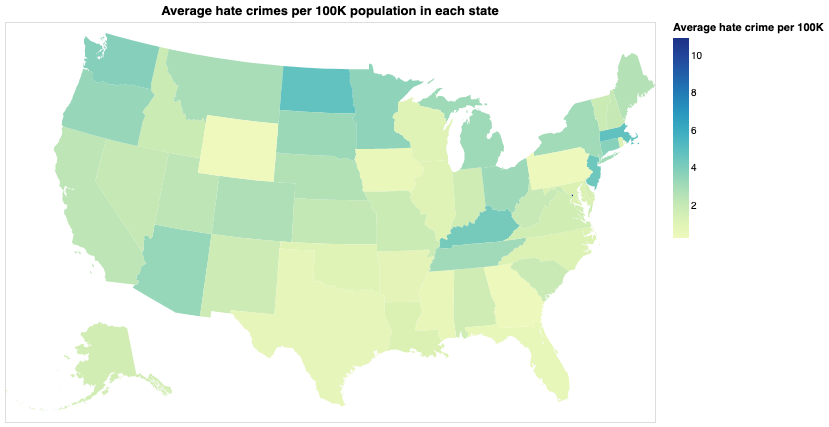

In [24]:
import altair as alt
import pandas as pd
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
hate_crime = pd.read_csv('../data/crime_state_id_clean.csv')

alt.Chart(states).mark_geoshape().encode(
    alt.Color('avg_hatecrimes_per_100k_fbi:Q',title="Average hate crime per 100K"),
    tooltip = [
        alt.Tooltip('avg_hatecrimes_per_100k_fbi:Q', title = 'Average hate crime per 100K'),
        alt.Tooltip('state:N')
    ]
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(hate_crime, 'id', ['avg_hatecrimes_per_100k_fbi','state'])
).project('albersUsa').properties(
    title='Average hate crimes per 100K population in each state',
    width=650,
    height=400)
